Problem Statement-
Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC.
You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
train=pd.read_csv('../input/bike-sharing-dataset/train_bikes.csv') ##Loading the training data
test=pd.read_csv("../input/bike-sharing-dataset/test_bikes.csv") ##Loading the testing data

In [3]:
train.head() 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.groupby(['workingday']).sum()['count'] 

workingday
0     654872
1    1430604
Name: count, dtype: int64

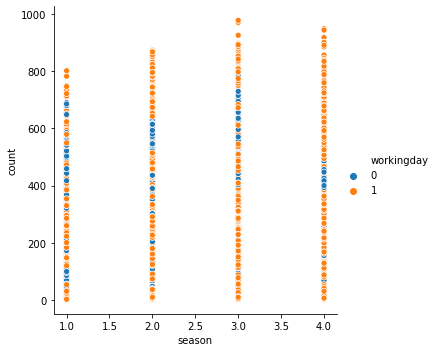

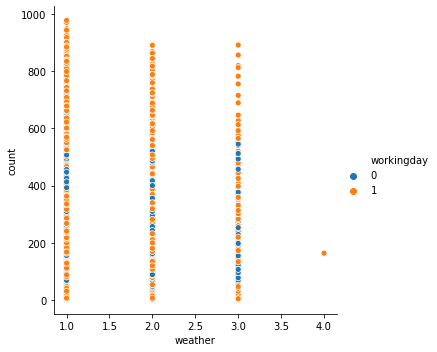

In [5]:
sns.relplot(x='season',y='count',data=train,hue='workingday') 
sns.relplot(x='weather',y='count',data=train,hue='workingday')

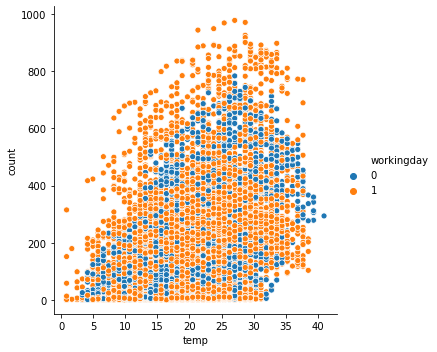

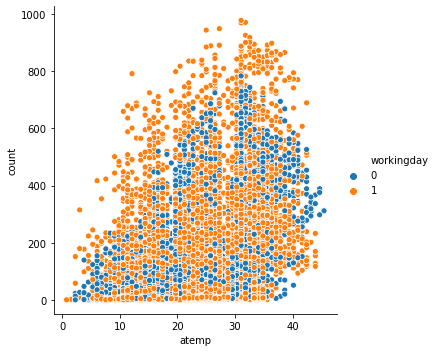

In [6]:
sns.relplot(x='temp',y='count',data=train,hue='workingday')
sns.relplot(x='atemp',y='count',data=train,hue='workingday')

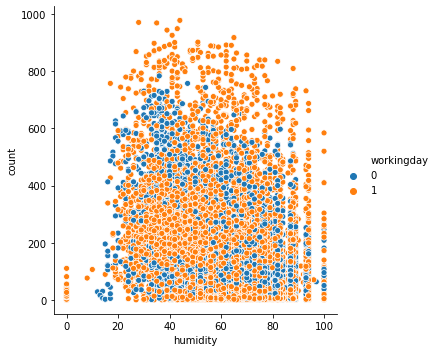

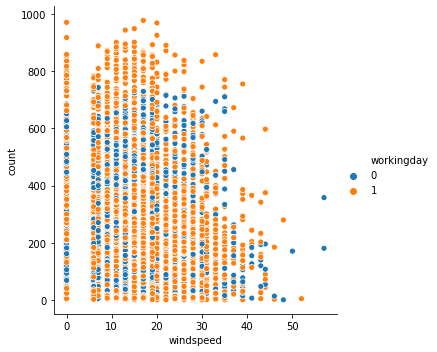

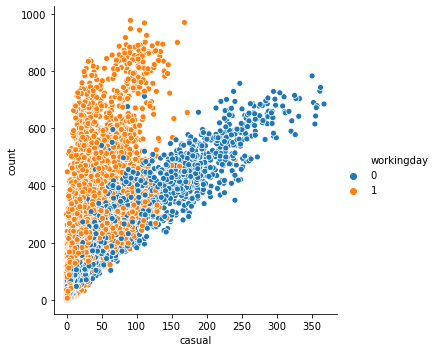

In [7]:
sns.relplot(x='humidity',y='count',data=train,hue='workingday')
sns.relplot(x='windspeed',y='count',data=train,hue='workingday')
sns.relplot(x='casual',y='count',data=train,hue='workingday')

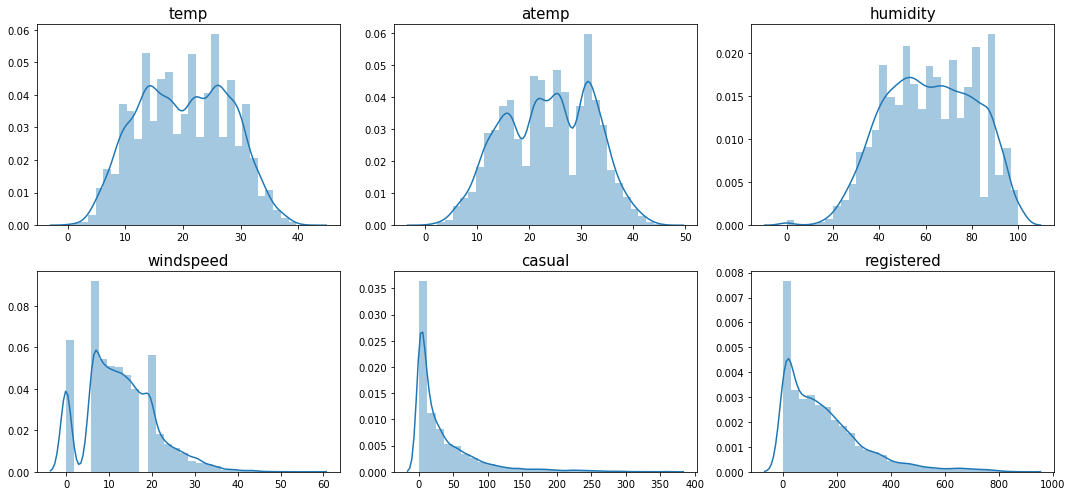

In [8]:
cols = ['temp','atemp','humidity','windspeed','casual','registered']
fig, axes = plt.subplots(2,3,figsize = (10,5))

count=0
for i in range(2):
    for j in range(3):
        x = cols[count+j]
        sns.distplot(train[x].values, ax = axes[i][j],bins = 30)
        axes[i][j].set_title(x,fontsize=15)
        fig.set_size_inches(15,7)
        plt.tight_layout()
    count = count+j+1 


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [11]:
print("Shape of training dataset is: ",train.shape)
print("Does the traing dataset have null values ? -",train.isnull().values.any())

Shape of training dataset is:  (10886, 12)
Does the traing dataset have null values ? - False


In [12]:
visual_df = train.copy()

In [13]:
train['datetime'] = pd.to_datetime(train['datetime'] )#changing the dtype of datetime field to datetime
train['year']=train.datetime.dt.year
train['month']=train.datetime.dt.month
train['day']=train.datetime.dt.day
train['hour']=train.datetime.dt.hour
train['minute']=train.datetime.dt.minute

In [14]:
visual_df['datetime'] = pd.to_datetime(visual_df['datetime'] )#changing the dtype of datetime field to datetime

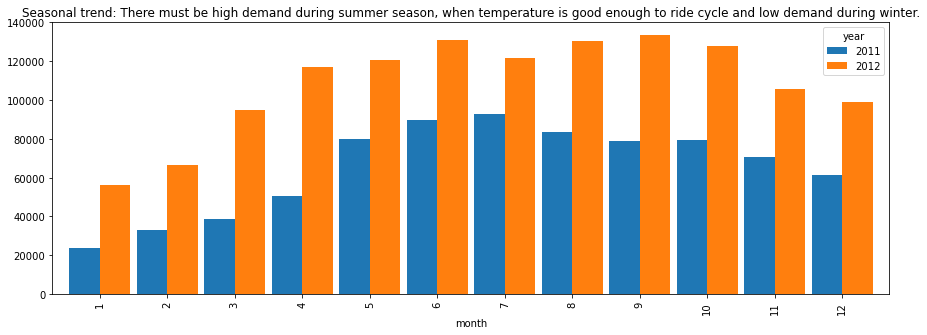

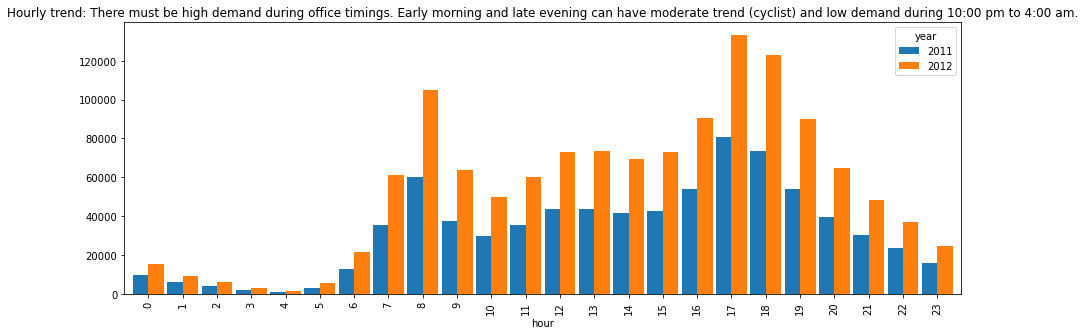

In [15]:
# method for creating the count plot based on hour for a given year 
def plot_by_month(data,aggre,title):
    d2 = data
    d2['year'] = d2.datetime.dt.year
    d2['month'] = d2.datetime.dt.month
    d2['hour'] = d2.datetime.dt.hour
    
    by_year = d2.groupby([aggre,'year'])['count'].sum().unstack() # groupby hour and working day
    
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title) # returning the figure grouped by hour

plot_by_month(visual_df,'month', "Seasonal trend: There must be high demand during summer season, when temperature is good enough to ride cycle and low demand during winter.")  
plot_by_month(visual_df,'hour', "Hourly trend: There must be high demand during office timings. Early morning and late evening can have moderate trend (cyclist) and low demand during 10:00 pm to 4:00 am.") 

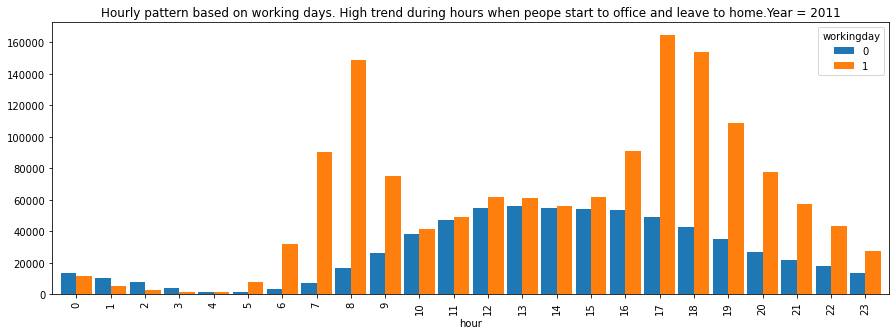

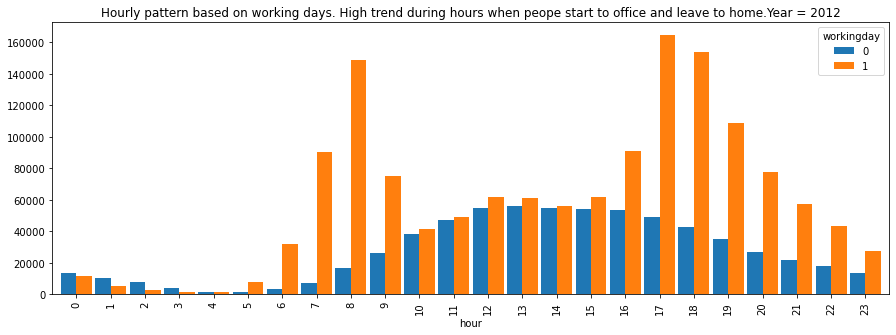

In [16]:
# method for creating the count plot based on hour for a given year 
def plot_by_hour(data, year):
    d1 = data
    d1['hour'] = d1.datetime.dt.hour
    
    by_hour = d1.groupby(['hour', 'workingday'])['count'].sum().unstack() # groupby hour and working day
    
    return by_hour.plot(kind='bar', figsize=(15,5), width=0.9, title="Hourly pattern based on working days. High trend during hours when peope start to office and leave to home.Year = {0}".format(year)) # returning the figure grouped by hour


plot_by_hour(visual_df, year=2011) # plotting the count plot based on hour for 2011 
plot_by_hour(visual_df, year=2012) # plotting the count plot based on hour for 2012

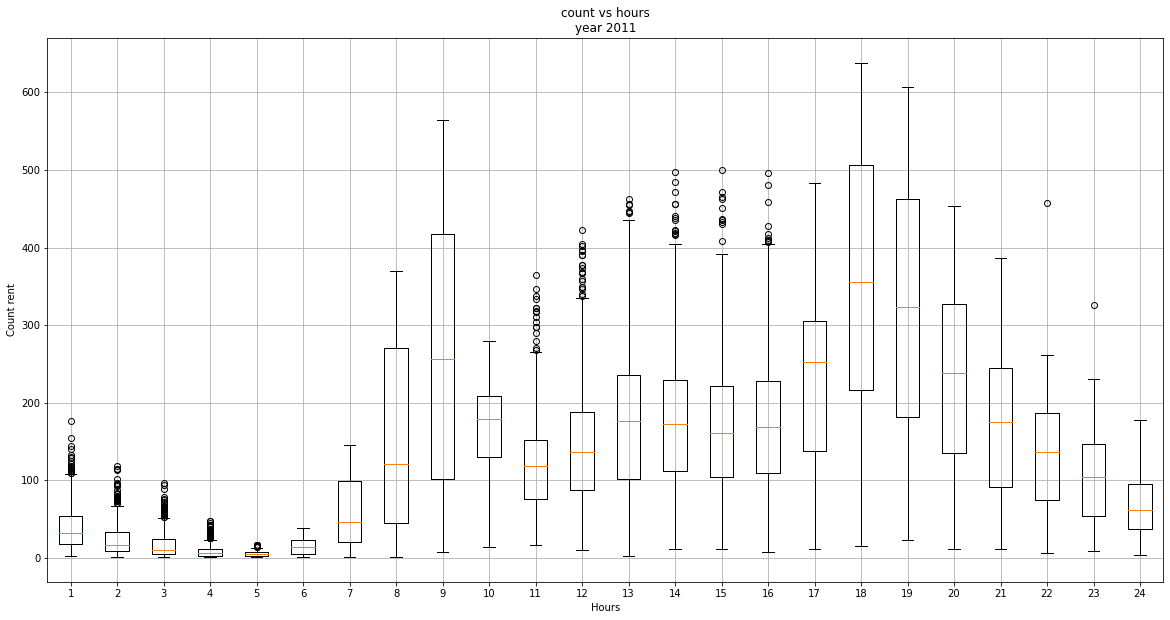

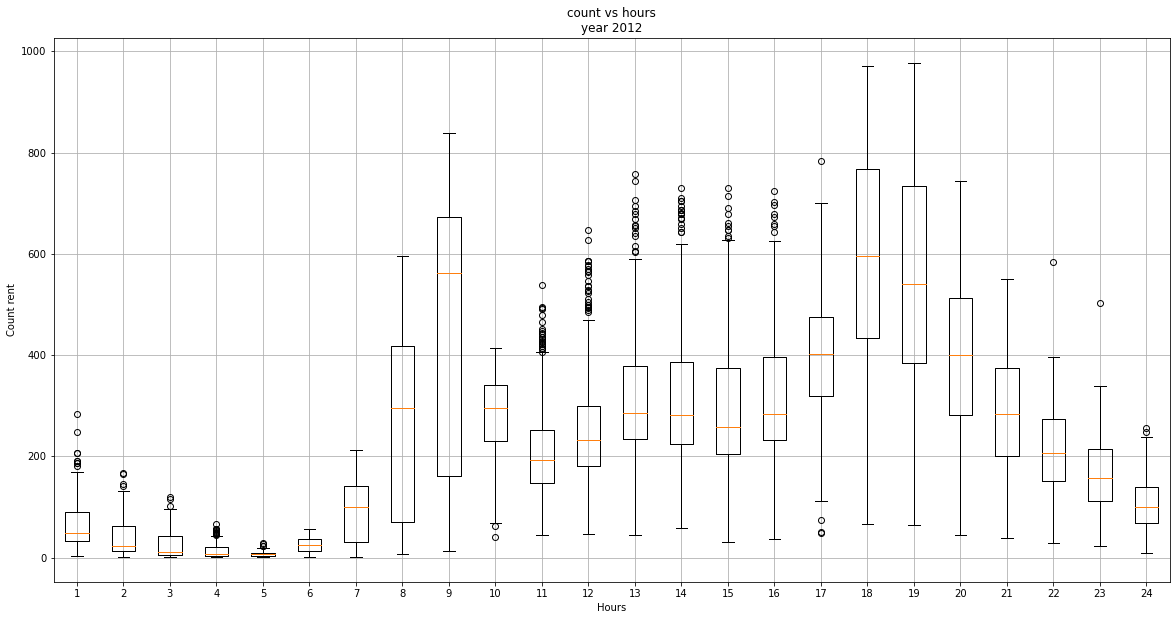

In [17]:
def plot_hours(data, message):
    d2 = data.copy()
    d2['hour'] = data.datetime.dt.hour # extratcing the hour
    
    hours = {}

    for hour in range(24):
        hours[hour] = d2[ d2.hour == hour ]['count'].values

    
    plt.figure(figsize=(20,10))
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("count vs hours\n" + message)
    plt.boxplot( [hours[hour] for hour in range(24)] )
    plt.grid()
    

plot_hours( visual_df[visual_df.datetime.dt.year == 2011], 'year 2011') # box plot for hourly count for the mentioned year
plot_hours( visual_df[visual_df.datetime.dt.year == 2012], 'year 2012') # box plot for hourly count for the mentioned year
 

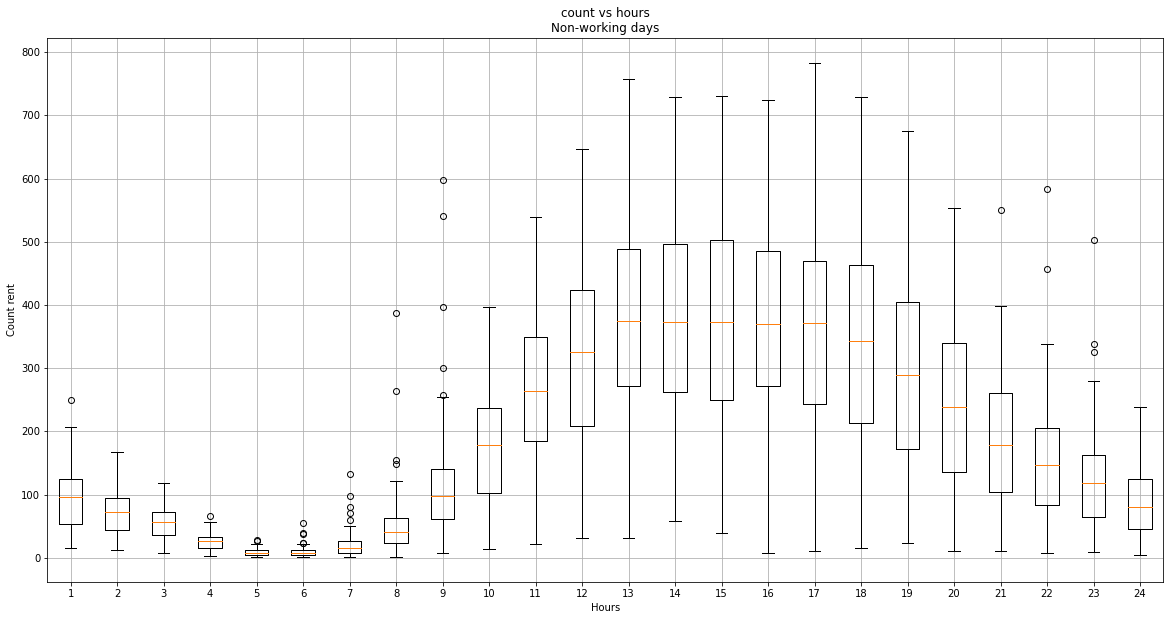

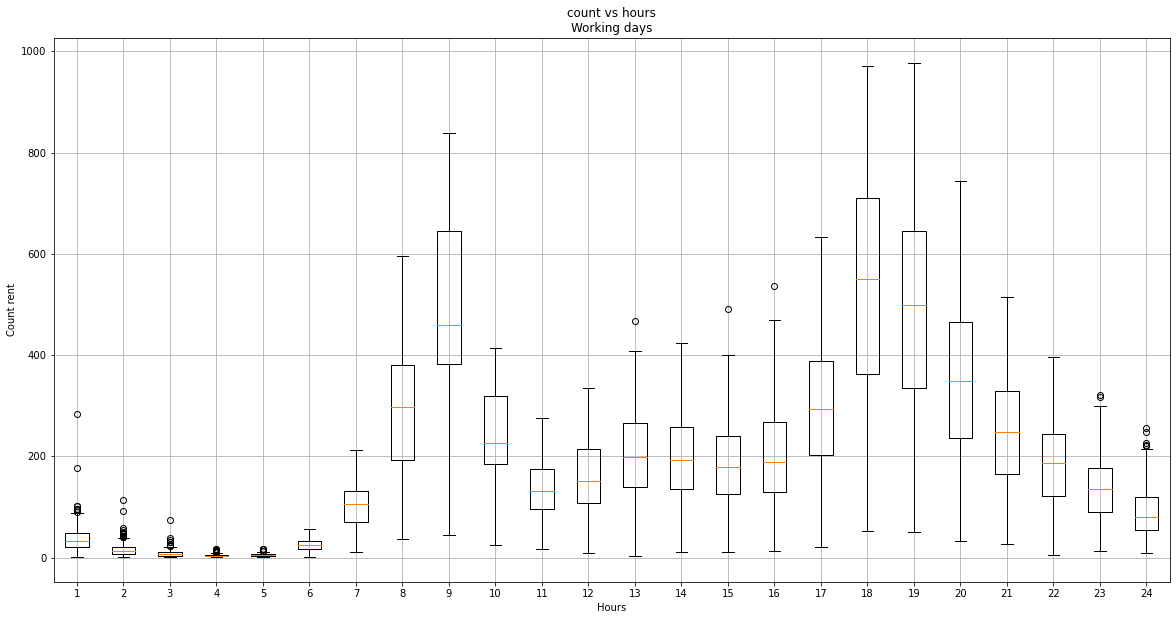

In [18]:

plot_hours( visual_df[visual_df.workingday == 0], 'Non-working days') # box plot for hourly count for the mentioned year
plot_hours( visual_df[visual_df.workingday == 1], 'Working days') # box plot for hourly count for the mentioned year

In [19]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

# Model Training

In [20]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [22]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0


In [23]:
train['count'] = np.log(train['count']+1)

In [24]:
y_train = train['count'] ## Capture the dependent feature
x_train = train.drop(['datetime','count'],axis=1) ## Capture the independent feature

In [25]:
x_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute
0,1,0,0,1,9.84,14.395,81,0.0,3,13,2011,1,1,0,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,2011,1,1,1,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,2011,1,1,2,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,2011,1,1,3,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,2011,1,1,4,0


In [26]:
test.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [27]:
x_train1 = x_train.drop(['casual','registered'],axis=1) # Removing casual and registered as its not available in test data

In [28]:
x_train_pred,x_test_pred,y_train_pred,y_test_pred = train_test_split(x_train1,y_train, test_size=0.3, random_state=42)

In [29]:
x_train_pred.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute
613,1,0,1,1,9.02,9.09,32,39.0007,2011,2,8,17,0
4030,3,0,0,1,22.14,25.76,68,12.9980,2011,9,18,23,0


In [30]:
models=[RandomForestRegressor(),Lasso(alpha=0.01),DecisionTreeRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','Lasso','DecisionTreeRegressor','SVR','KNeighborsRegressor']
rmse=[]
r_squared=[]
dic={}
for model in range (len(models)):
    alg=models[model]
    alg.fit(x_train_pred,y_train_pred)
    alg_y_pred=alg.predict(x_test_pred)
    rmse.append(np.sqrt(mean_squared_error(y_test_pred,alg_y_pred)))
    r_squared.append(r2_score(y_test_pred,alg_y_pred))
dic={'Modelling Algorithms':model_names,'RMSE':rmse,'R-Squared':r_squared}   
model_performances= pd.DataFrame(dic)

model_performances

,Modelling Algorithms,RMSE,R-Squared
0,RandomForestRegressor,0.327340,0.946149
1,Lasso,1.021079,0.476024
2,DecisionTreeRegressor,0.455457,0.895747
3,SVR,1.299214,0.151690
4,KNeighborsRegressor,0.861804,0.626741


Text(0.5, 1.0, 'Algorithms vs RMSE')

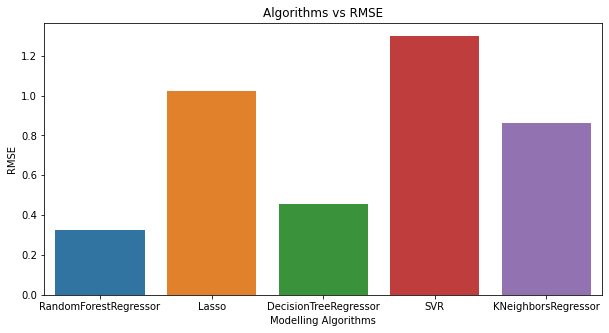

In [31]:
plt.figure(figsize = (10,5))
sns.barplot(x='Modelling Algorithms',y='RMSE',data=model_performances)
plt.title("Algorithms vs RMSE")

Text(0.5, 1.0, 'Algorithms vs R-Squared')

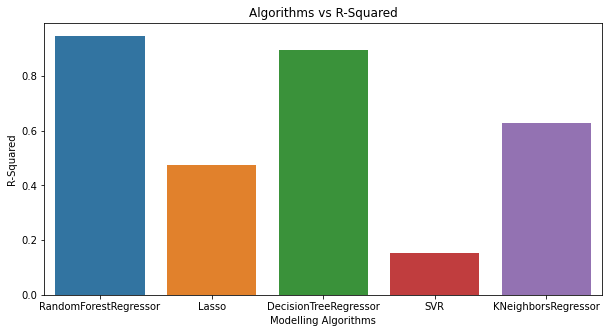

In [32]:
plt.figure(figsize = (10,5))
sns.barplot(x='Modelling Algorithms',y='R-Squared',data=model_performances)
plt.title("Algorithms vs R-Squared")

From above we can conclude that RandomForestRegressor fits good compared to other models taken into consideration. So lets fine tune RandomForestRegressor using randomized search.

# Hyperparameter Tuning

In [33]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

In [34]:
random_grid

{'n_estimators': [20, 65, 110, 155, 200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [1, 23, 45],
 'min_samples_split': [5, 10]}

In [35]:
rF_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rF_random.fit(x_train_pred,y_train_pred)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   38.1s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [36]:
rF_random.best_params_

{'n_estimators': 155,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 45}

In [37]:
# Performance Comparison
best_fit= rF_random.best_estimator_.predict(x_test_pred)
print("RMSE and R-Squared after hyperparameter tuning :\n")
print("Modelling algorithm: RandomForestRegressor ")
print("RMSE value is: ",np.sqrt(mean_squared_error(y_test_pred,best_fit)))
print("R-Squared value is ",r2_score(y_test_pred,best_fit))

RMSE and R-Squared after hyperparameter tuning :

Modelling algorithm: RandomForestRegressor 
RMSE value is:  0.3280239154194258
R-Squared value is  0.9459240567861007


# Testing

In [38]:
test.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [39]:
test['datetime'] = pd.to_datetime(test['datetime'])
test['year']=test.datetime.dt.year
test['month']=test.datetime.dt.month
test['day']=test.datetime.dt.day
test['hour']=test.datetime.dt.hour
test['minute']=test.datetime.dt.minute

In [40]:
test_val = test.drop(['datetime'],axis=1)

In [41]:
test_val.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0


In [42]:
predictions = rF_random.best_estimator_.predict(test_val)

In [43]:
predictions_exp = np.exp(predictions)-1

In [44]:
predictions_exp

array([ 12.35367068,   5.10917196,   3.70270296, ..., 130.93522772,
       109.08454255,  76.74432225])

In [45]:
submission = pd.DataFrame({'datetime':test['datetime'],'count': predictions_exp})

In [46]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,12.353671
1,2011-01-20 01:00:00,5.109172
2,2011-01-20 02:00:00,3.702703
3,2011-01-20 03:00:00,3.082357
4,2011-01-20 04:00:00,2.492516


In [47]:
submission_viz=submission.copy()

 The below barplot shows that test data prediction matchs that of the training data pattern.

In [48]:
submission_viz['datetime'] = pd.to_datetime(submission_viz['datetime'])

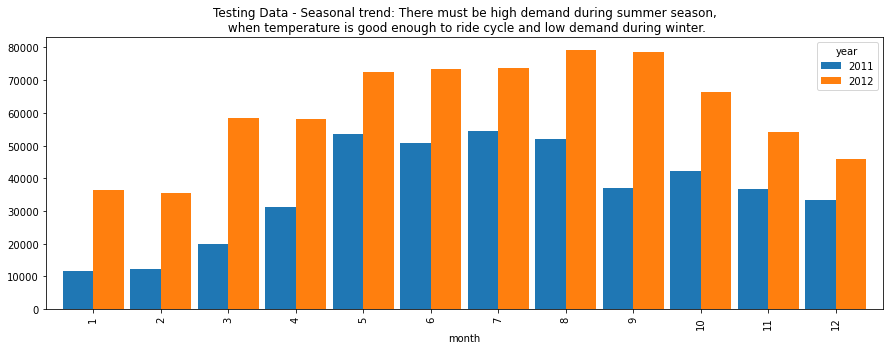

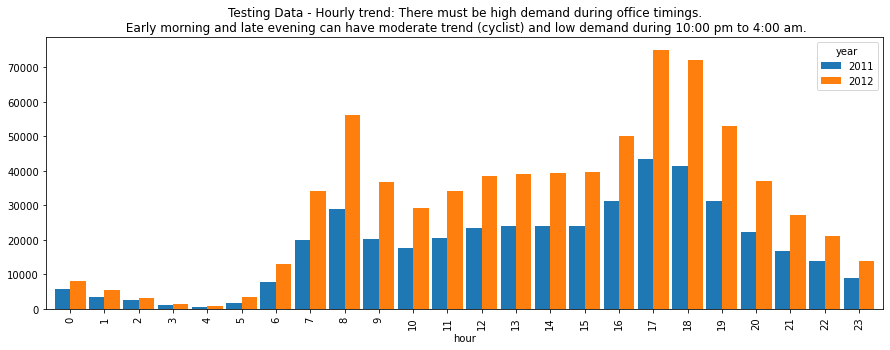

In [49]:
def plot_by_month_pred(data,aggre,title):
    d2 = data
    d2['year'] = d2.datetime.dt.year
    d2['month'] = d2.datetime.dt.month
    d2['hour'] = d2.datetime.dt.hour
    
    by_year = d2.groupby([aggre,'year'])['count'].sum().unstack() # groupby hour and working day
    
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title) # returning the figure grouped by hour


plot_by_month_pred(submission_viz,'month', "Testing Data - Seasonal trend: There must be high demand during summer season,\n when temperature is good enough to ride cycle and low demand during winter.")  
plot_by_month_pred(submission_viz,'hour', "Testing Data - Hourly trend: There must be high demand during office timings.\n Early morning and late evening can have moderate trend (cyclist) and low demand during 10:00 pm to 4:00 am.") 

In [50]:
submission.to_csv("sampleSubmission.csv",index=False)

#           Please upvote if you find useful